In [9]:
# PS5841 Data Science in Finance and Insurance HW5
# Young Sim, js5134

In [10]:
%matplotlib notebook

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import graphviz as gv
import mglearn

In [12]:
# Some plot functions

# Dicision Tree Plot function
#
def plot_decision_tree(tree, this_feature_names, target_names):
    from sklearn.tree import export_graphviz
    import graphviz as gv
    
    export_graphviz(tree, out_file="tree.dot", class_names=target_names,
        feature_names=this_feature_names, impurity=False, filled=True)

    # visulize the tree 
    with open("tree.dot") as f:
        dot_graph = f.read()
        plt_source=gv.Source(dot_graph)
        display(plt_source)
        
#
# Feature Importance Plot function
#
def plot_feature_importances(tree, this_feature_names):
    n_features = np.size(this_feature_names)
    plt.figure()
    plt.barh(range(n_features), tree.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), this_feature_names)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.subplots_adjust(left=0.35)
    plt.show()
    
#
# Decision Region plot function
#
def plot_decision_region(tree, X, y, this_title, this_xlabel, this_ylabel, this_legend):
    
        x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        this_xticks = np.arange(x_min+0.5,x_max-0.5, 1)
        this_yticks = np.arange(y_min+0.5,y_max-0.5, 1)
    
        plt.figure()
        mglearn.plots.plot_tree_partition(X, y, tree)
        
        plt.title(this_title)
        plt.xlabel(this_xlabel)
        plt.ylabel(this_ylabel)
        plt.legend(this_legend)
        plt.xticks(this_xticks)
        plt.yticks(this_yticks)
    
#
#  Tree Partition Plot function:  mglearn.plots.plot_tree_partition(X, y, tree)
#

Accuracy on training set: 1.00
Accuracy on test set: 0.97


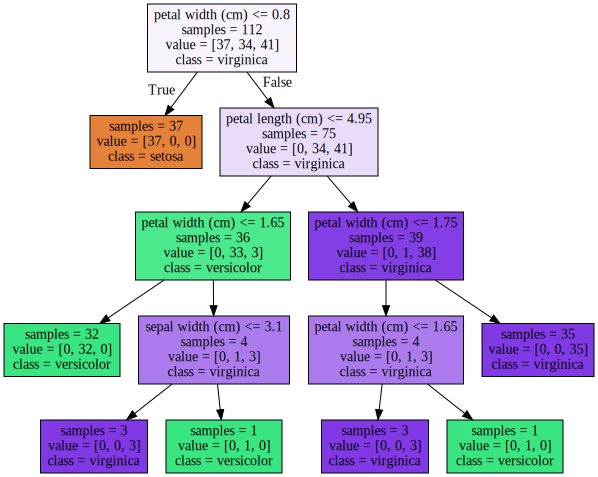

The accuracy on training set is higher than the accuracy on test set, which suggests that the model is overfitting.


In [13]:
# Problem 1: 
#
# Load Iris dataset
from sklearn.datasets import load_iris
iris_dataset = load_iris()
    
# Import decision tree classifier
from sklearn.tree import DecisionTreeClassifier
    
# Split data into training data and test data and use random_state = 0
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(iris_dataset['data'], iris_dataset['target'], random_state=0)


def problem1_solution():
    
    # write your code here
    
    # Fit the model with random_state = 0 and print out training score and test score. what is your concern on the result?
    tree = DecisionTreeClassifier(random_state=0)
    tree.fit(X_train, y_train)
    print("Accuracy on training set: {:.2f}".format(tree.score(X_train, y_train)))
    print("Accuracy on test set: {:.2f}".format(tree.score(X_test, y_test)))
    
    # Plot the decision tree structure
    plot_decision_tree(tree,iris_dataset['feature_names'],iris_dataset['target_names'])
    
    # Return the model classifier as an output
    return tree
    
clf = problem1_solution()

# What is your concern on the result?
print("The accuracy on training set is higher than the accuracy on test set, which suggests that the model is overfitting.")

Accuracy on training set: 0.98
Accuracy on test set: 0.97


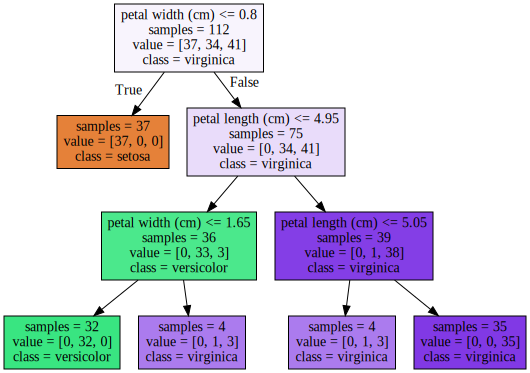

Reducing the tree level by setting max_depth and thus reducing the complexity of the tree is a common strategy to prevent overfitting. Stopping the creation of the tree early like this is called pre-pruning.


In [14]:
# Problem 2:
#
def problem2_solution():
        
    # write your code here
    
    # Use the same dataset but fit the model with max_depth=3, and random_state = 0
    tree = DecisionTreeClassifier(max_depth=3,random_state=0)
    tree.fit(X_train, y_train)
    
    # Print out training score and test score again
    print("Accuracy on training set: {:.2f}".format(tree.score(X_train, y_train)))
    print("Accuracy on test set: {:.2f}".format(tree.score(X_test, y_test)))
    
    # Plot the decision tree structure
    plot_decision_tree(tree,iris_dataset['feature_names'],iris_dataset['target_names'])
    
    # Return the model classifier as an output
    return tree
    
clf2 = problem2_solution()

# Why we want to reduce the tree level? what's the terminology for this approach?
print("Reducing the tree level by setting max_depth and thus reducing the complexity of the tree is a common strategy to prevent overfitting. Stopping the creation of the tree early like this is called pre-pruning.")

<IPython.core.display.Javascript object>


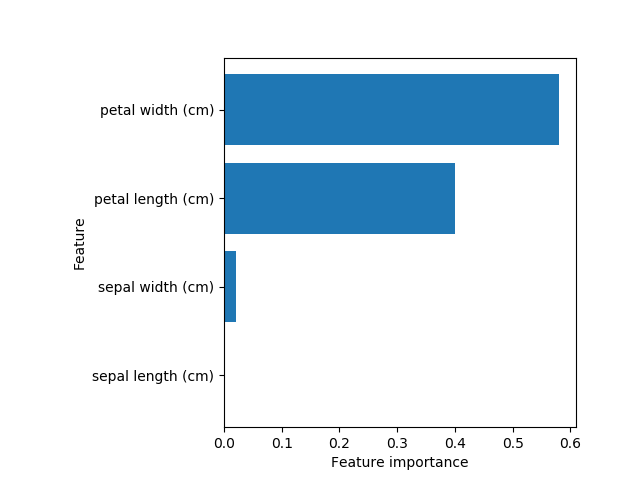

In [15]:
# Problem 3:
# Calculate and print out the feature importance in Problem 1 (with random_state = 0 )
# plot out the feature importance
#

def problem3_solution():
    
    # Write your code here
    plot_feature_importances(clf, iris_dataset['feature_names'])    

problem3_solution()



<IPython.core.display.Javascript object>


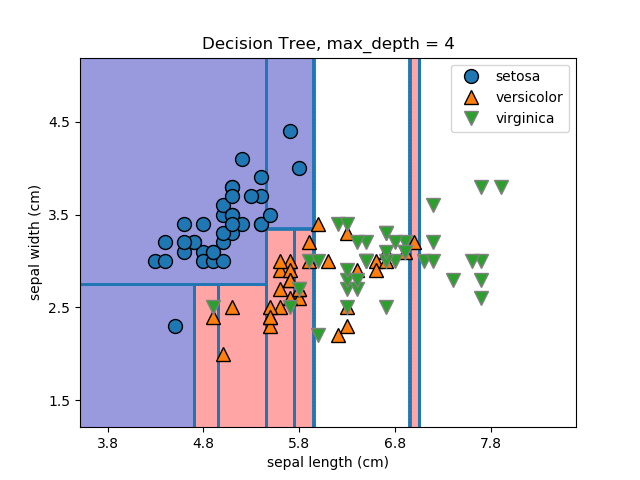

<IPython.core.display.Javascript object>


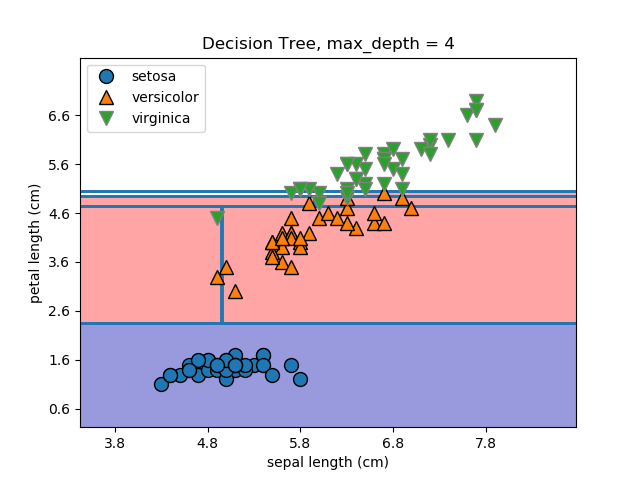

<IPython.core.display.Javascript object>


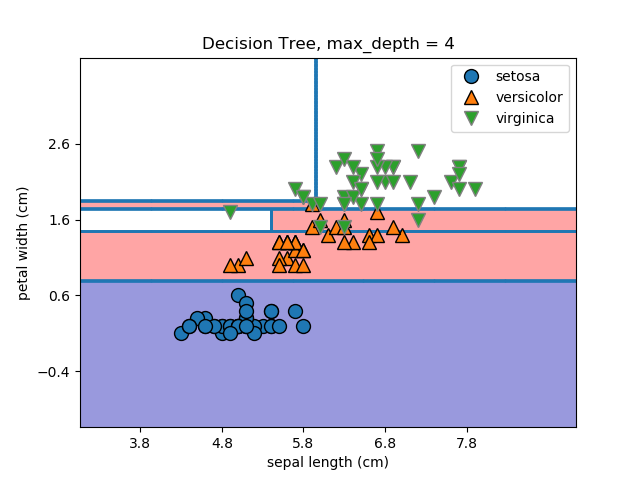

<IPython.core.display.Javascript object>


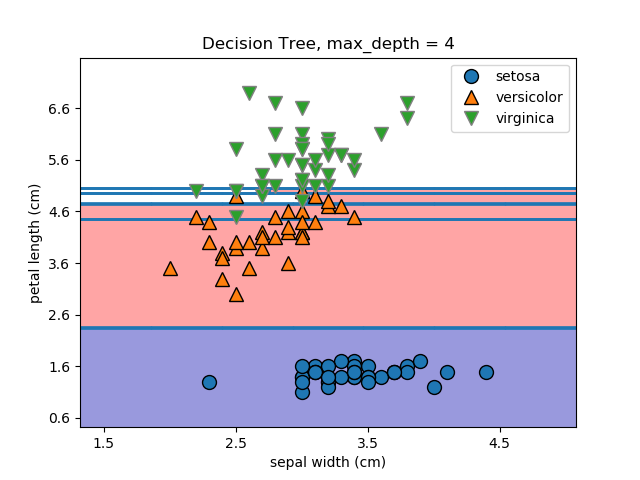

<IPython.core.display.Javascript object>


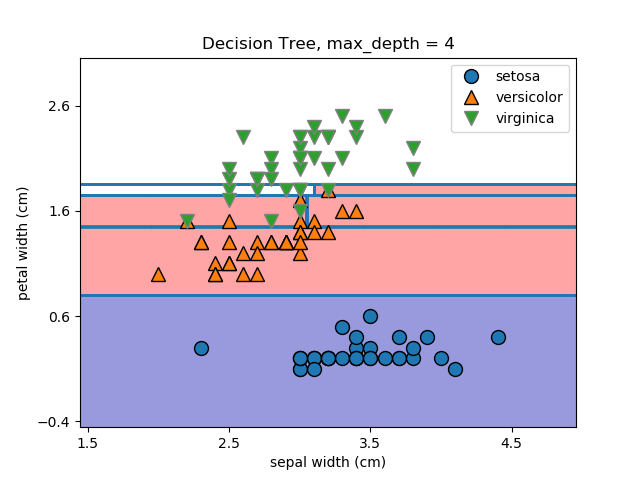

<IPython.core.display.Javascript object>


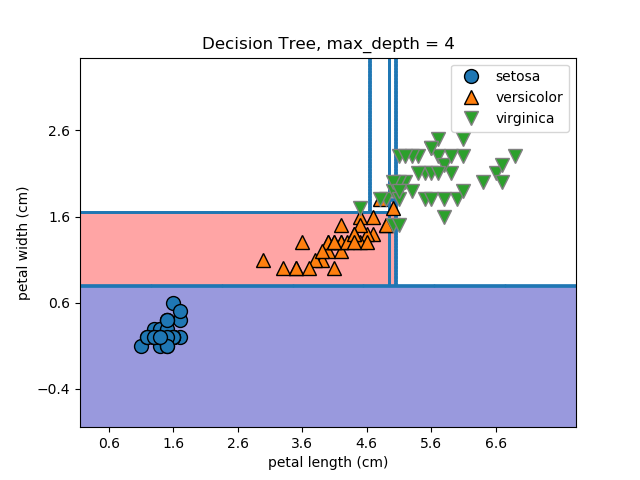

In [16]:
# Problem 4:
# Use the same dataset and the same train-test data split as in Problem 1
# For a decision tree classifier for each pair of featuress with a given max_depth (=4) and random_state = 0
# plot out the tree partion for each pair of features
# 
def problem4_solution(tree_max_depth, this_random_state):
    
    # write your code here
    from itertools import combinations
    c = combinations(range(4),2)
    
    for index in c:
        i = index[0]
        j = index[1]
        tree = DecisionTreeClassifier(max_depth=tree_max_depth,random_state=this_random_state)
        tree.fit(X_train[:,[i,j]],y_train)
        plot_decision_region(tree, X_train[:,[i,j]], y_train, 'Decision Tree, max_depth = ' + str(tree_max_depth), iris_dataset['feature_names'][i],iris_dataset['feature_names'][j],iris_dataset['target_names'])

problem4_solution(4, 0)